In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline


In [2]:
import squarify as sq

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1',index_col='Unnamed: 0')
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
#help(pd.read_csv)

In [7]:
#Calculates the number of rows and columns
print(df.shape)

(50, 13)


In [8]:
#Renaming the columns
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [9]:
df.isnull().sum()
#df.fillna(0)

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [10]:
df.dtypes

track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [11]:
#Calculating the number of songs of each genre
print(type(df['Genre']))
popular_genre=df.groupby('Genre').size()
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


In [12]:
#Calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
#print(popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [13]:
artist_list

['Shawn Mendes',
 'Anuel AA',
 'Ariana Grande',
 'Ed Sheeran',
 'Post Malone',
 'Ed Sheeran',
 'Lil Tecca',
 'Sam Smith',
 'Lil Nas X',
 'Billie Eilish',
 'Bad Bunny',
 'DJ Snake',
 'Lewis Capaldi',
 'Sech',
 'Drake',
 'Chris Brown',
 'J Balvin',
 'Post Malone',
 'Y2K',
 'Lizzo',
 'MEDUZA',
 'Lil Nas X',
 'Jhay Cortez',
 'Lunay',
 'Billie Eilish',
 'Shawn Mendes',
 'Tones and I',
 'Ali Gatie',
 'Daddy Yankee',
 'J Balvin',
 'The Chainsmokers',
 'Ariana Grande',
 'Maluma',
 'Young Thug',
 'Katy Perry',
 'Martin Garrix',
 'Sech',
 'Ed Sheeran',
 'Jonas Brothers',
 'Lauv',
 'Kygo',
 'Taylor Swift',
 'Lady Gaga',
 'Khalid',
 'ROSALÍA',
 'Marshmello',
 'Nicky Jam',
 'Marshmello',
 'The Chainsmokers',
 'Ed Sheeran']

In [14]:
pd.set_option('precision', 3)
df.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [15]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas.core.config object:

class CallableDynamicDoc(builtins.object)
 |  CallableDynamicDoc(func, doc_tmpl)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __init__(self, func, doc_tmpl)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness(dB)       -0.832
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


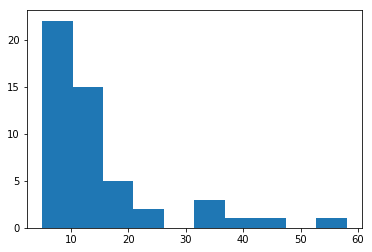

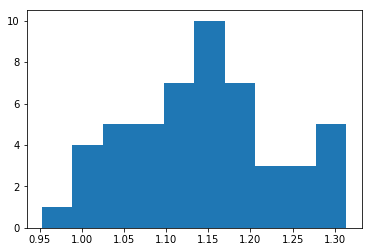

In [16]:
#Finding out the skew for each attribute
skew=df.skew()
print(skew)
# Removing the skew by using the boxcox transformations
transform=np.asarray(df[['Liveness']].values)
df_transform = stats.boxcox(transform)[0]
# Plotting a histogram to show the difference 
plt.hist(df['Liveness'],bins=10) #original data
plt.show()
plt.hist(df_transform,bins=10) #corrected skew data
plt.show()

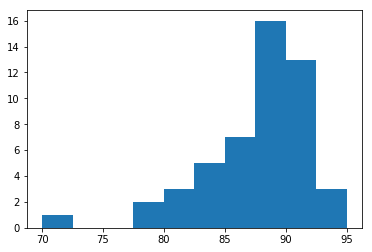

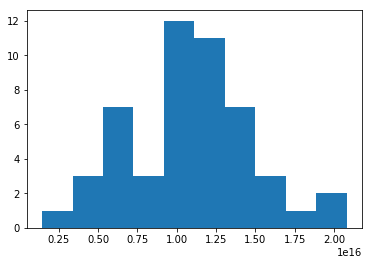

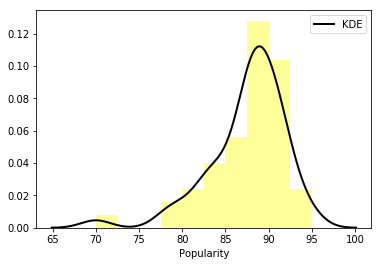

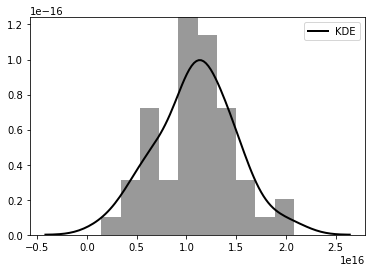

In [17]:
transform1=np.asarray(df[['Popularity']].values)
df_transform1 = stats.boxcox(transform1)[0]
# Plotting a histogram to show the difference 
plt.hist(df['Popularity'],bins=10) # original data
plt.show()
plt.hist(df_transform1,bins=10) #corrected skew data
plt.show()
sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') #corrected skew data
plt.show()

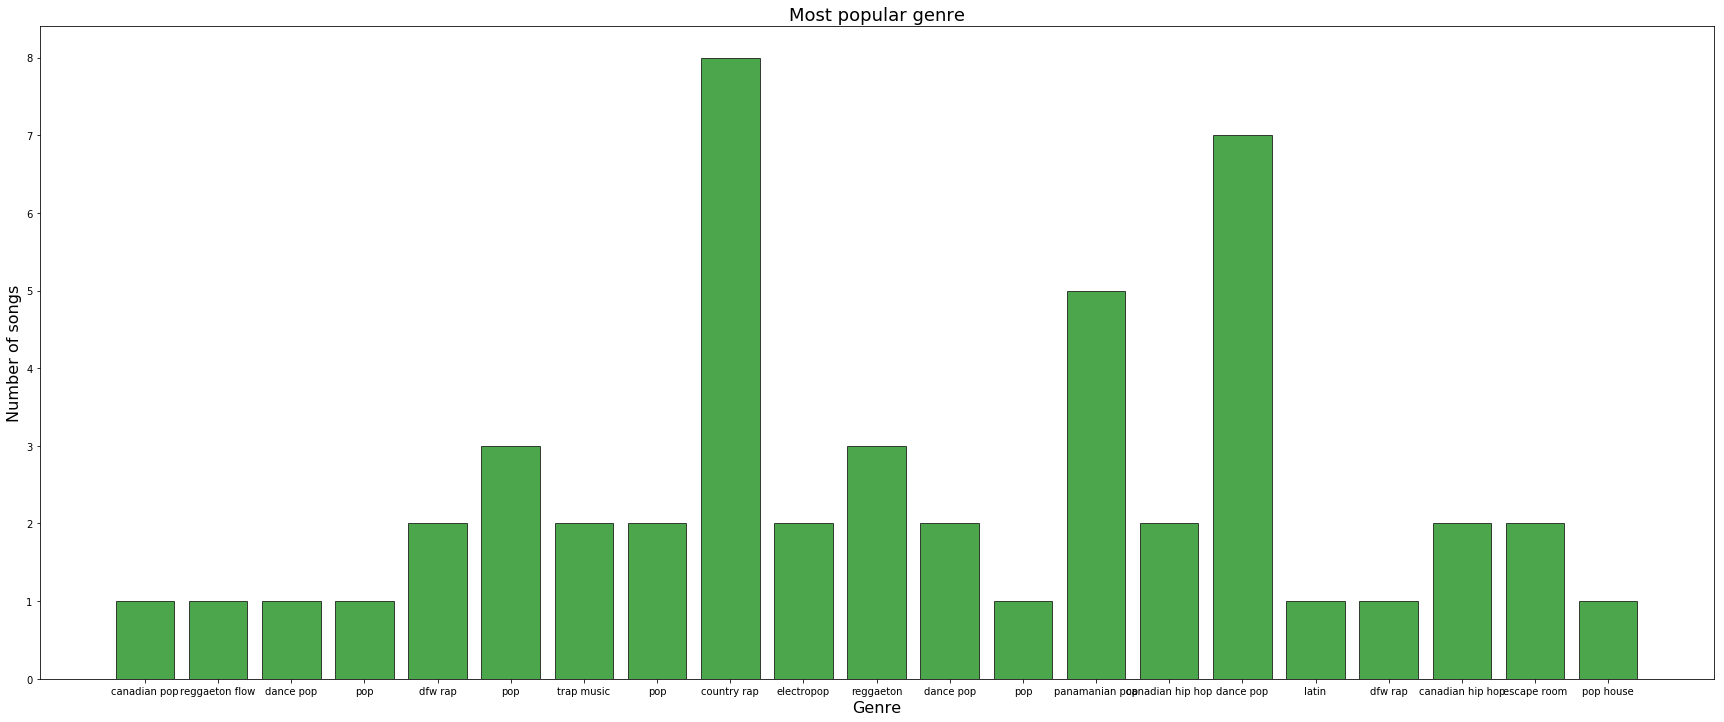

In [18]:
# Bar graph to see the number of songs of each genre
fig, ax=plt.subplots(figsize=(30,12))
length=np.arange(len(popular_genre))
plt.bar(length,popular_genre,color='green',edgecolor='black',alpha=0.7)
plt.xticks(length,genre_list)
plt.title('Most popular genre',fontsize=18)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Number of songs',fontsize=16)
plt.show()

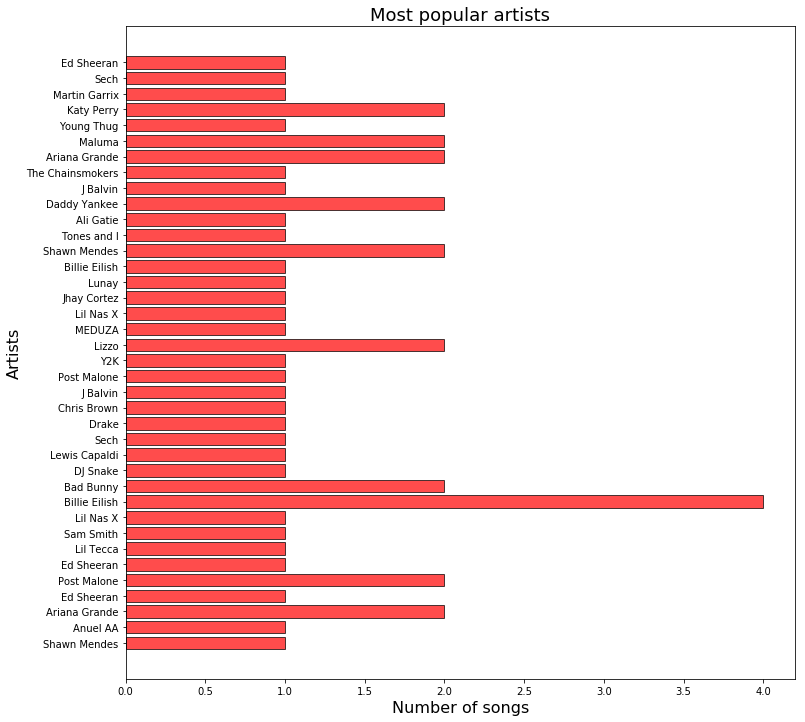

In [19]:
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(popular_artist))
plt.barh(length,popular_artist,color='red',edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()

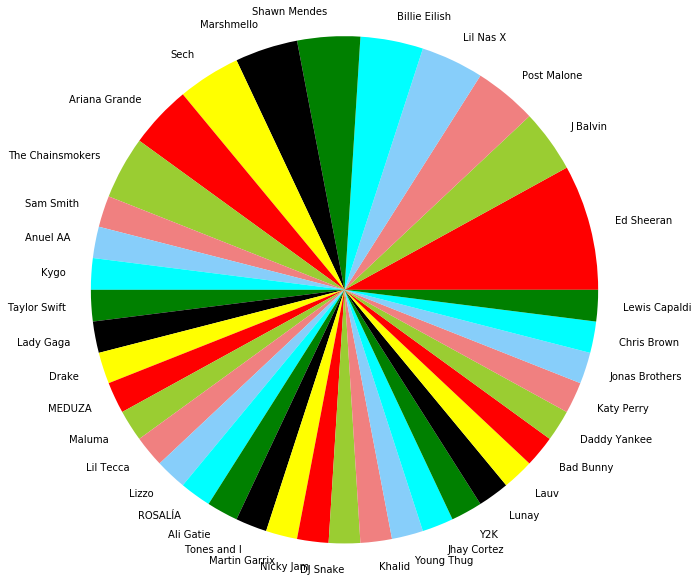

In [20]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [21]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [22]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [23]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

99.61875683127676
[-0.08225541 -0.01295157 -0.02074932  0.1608828  -0.05645643]


In [24]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       93     84.329
1       89     87.255
2       84     87.112
3       86     87.370
4       88     89.171
5       92     84.571
6       91     87.281
7       91     88.124
8       87     87.042
9       79     88.956
10      90     87.561
11      88     87.162
12      91     86.478
13      89     86.872
14      88     86.392


In [25]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.441641948008487
Mean Squared Error: 20.11903485629485
Root Mean Squared Error: 4.485424713033856


In [26]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [27]:
spotify_data=pd.read_csv(filename,encoding='ISO-8859-1')
spotify_data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [28]:
new_spotify_data=spotify_data.drop(['Track.Name','Unnamed: 0'],axis=1,inplace=False)
numericalattributes=new_spotify_data.columns[2:]


In [29]:
print(new_spotify_data.columns)
popula_array=new_spotify_data['Popularity']
new_spotify_data.drop(['Popularity'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(new_spotify_data,popula_array ,test_size=0.2, random_state=42)

Index(['Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy', 'Danceability',
       'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..',
       'Speechiness.', 'Popularity'],
      dtype='object')
